In [1]:
!pip3 install torch torchvision torchaudio

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:

!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Cyril/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-19 Python-3.10.0 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:

model


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [9]:

results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1386.0ms pre-process, 190.1ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


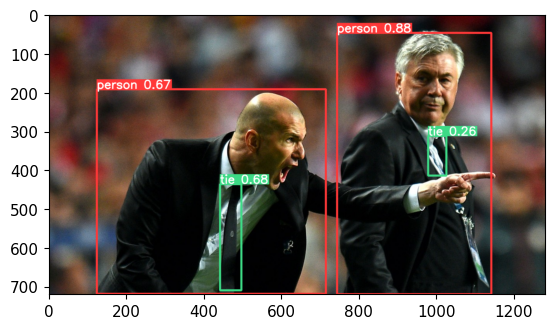

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [12]:

import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [16]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [15]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.8df995da-e5b4-11ee-983b-6018954098da.jpg


In [14]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.8c209486-e5b4-11ee-ad6d-6018954098da.jpg
data\images\awake.8c209487-e5b4-11ee-894f-6018954098da.jpg
data\images\awake.8c209488-e5b4-11ee-b119-6018954098da.jpg
data\images\awake.8c209489-e5b4-11ee-ae30-6018954098da.jpg
data\images\awake.8c20948a-e5b4-11ee-812e-6018954098da.jpg
data\images\awake.8c20948b-e5b4-11ee-8d4c-6018954098da.jpg
data\images\awake.8c20948c-e5b4-11ee-b8ef-6018954098da.jpg
data\images\awake.8c20948d-e5b4-11ee-935e-6018954098da.jpg
data\images\awake.8c20948e-e5b4-11ee-b40c-6018954098da.jpg
data\images\awake.8c20bb6e-e5b4-11ee-9695-6018954098da.jpg
data\images\drowsy.8c20bb6f-e5b4-11ee-a539-6018954098da.jpg
data\images\drowsy.8c20bb70-e5b4-11ee-8769-6018954098da.jpg
data\images\drowsy.8c20bb71-e5b4-11ee-97ea-6018954098da.jpg
data\images\drowsy.8c20bb72-e5b4-11ee-af2e-6018954098da.jpg
data\images\drowsy.8c20bb73-e5b4-11ee-a23d-6018954098da.jpg
data\images\drowsy.8c20bb74-e5b4-11ee-821e-6018954098da.jpg
data\images\drowsy.8c20bb75-e5b4-11ee-9da5-6018954

In [17]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 300 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-294-gdb125a20 Python-3.10.0 torch-2.2.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [20]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Cyril/.cache\torch\hub\master.zip
YOLOv5  2024-3-19 Python-3.10.0 torch-2.2.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
import os
img = os.path.join('data', 'images', 'drowsy.c71c0fdb-e5b4-11ee-b5ae-6018954098da.jpg')
img2 = os.path.join('data', 'images', 'awake.b58d4788-e5b4-11ee-9bc6-6018954098da.jpg')

In [31]:
result1=model(img2)
results = model(img)

In [32]:

results.print()
result1.print()

image 1/1: 480x640 1 drowsy
Speed: 14.8ms pre-process, 475.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 awake
Speed: 21.1ms pre-process, 540.1ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


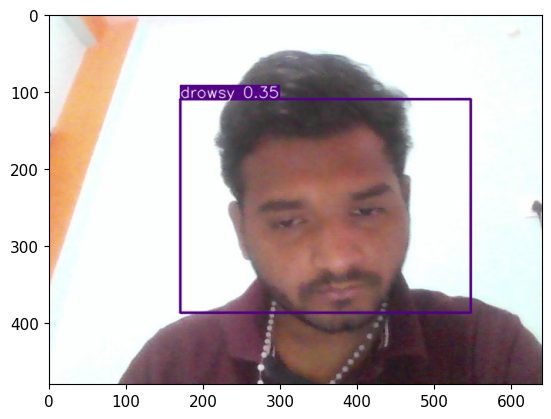

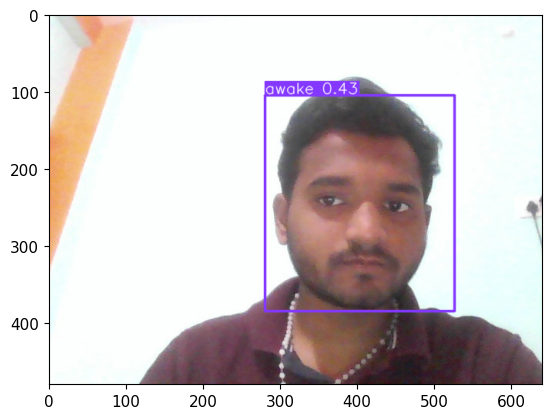

: 

In [33]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
plt.imshow(np.squeeze(result1.render()))
plt.show()

In [29]:
import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 